In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/Diamond Price Prediction.csv')

In [ ]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
## As the column names of few columns are difficult let's convert it into readable form
df.rename(columns = {'Carat(Weight of Daimond)':'Carat', 'Cut(Quality)': 'Cut', 'Price(in US dollars)':'Price', 'X(length)': 'Length',	'Y(width)':'Width', 'Z(Depth)':'Height'}, inplace = True)

In [ ]:
df.isnull().sum()

Carat      0
Cut        0
Color      0
Clarity    0
Depth      0
Table      0
Price      0
Length     0
Width      0
Height     0
dtype: int64

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.Cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: Cut, dtype: int64

In [ ]:
df.Color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: Color, dtype: int64

In [ ]:
df.Clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: Clarity, dtype: int64

In [ ]:
df.describe()

,Carat,Depth,Table,Price,Length,Width,Height
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Checking linearity

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

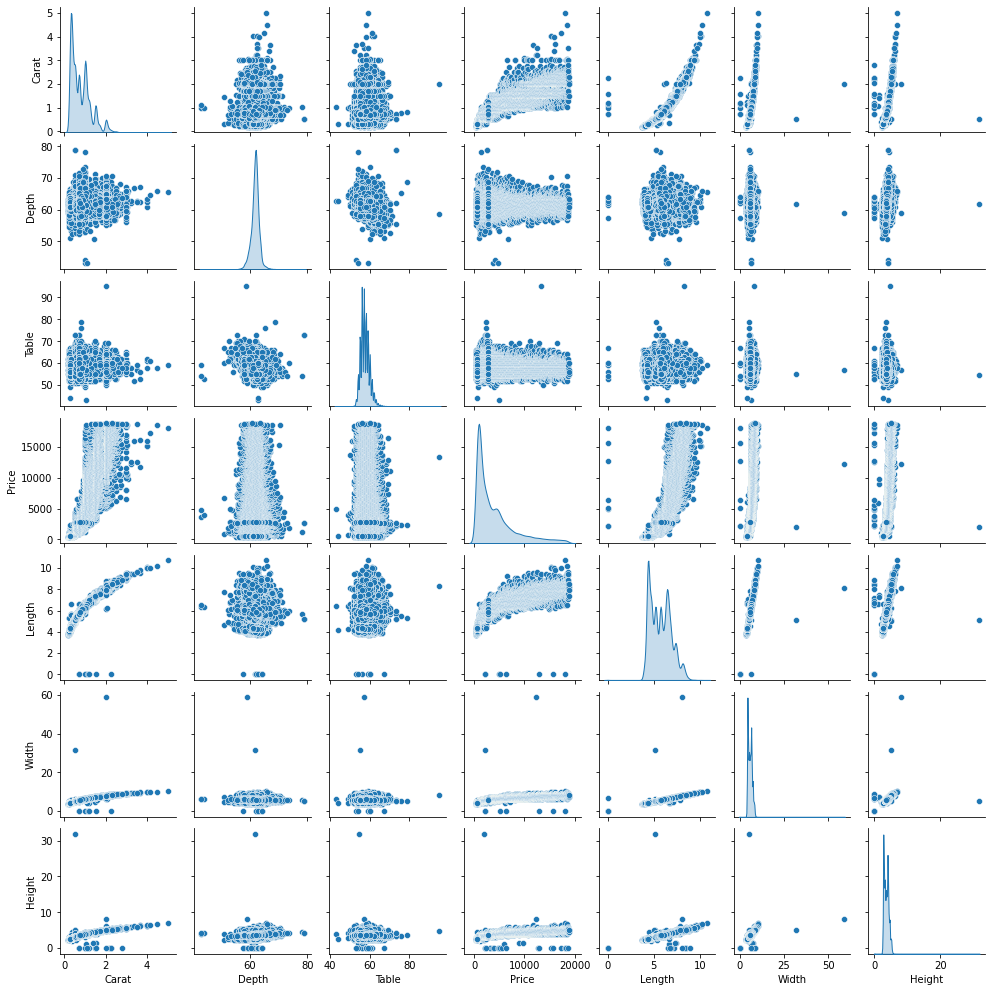

In [ ]:

plt.figure(figsize = (20,20))
columns= ['Carat',	'Depth',	'Table',	'Price',	'Length',	'Width',	'Height']

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

## Checking Outliers

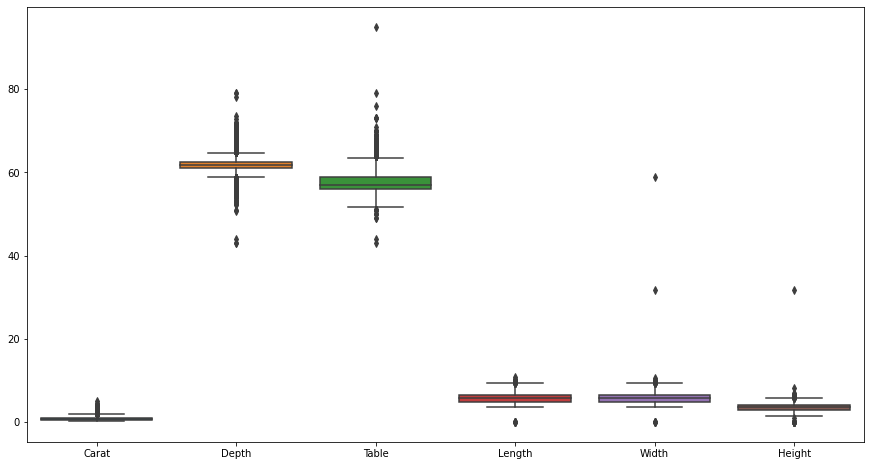

In [ ]:
columns= ['Carat',	'Depth',	'Table',	'Length',	'Width',	'Height']
plt.figure(figsize = (15,8))
sns.boxplot(data = df[columns])

## Normalizing the target column

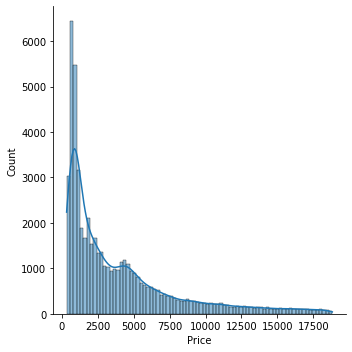

In [ ]:
sns.displot(df['Price'],kde=True)

In [ ]:
df['log_price']=np.log(df['Price'])

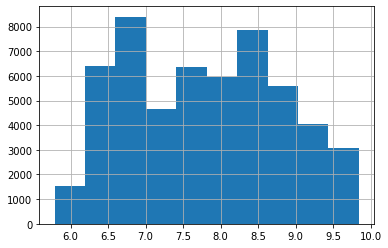

In [ ]:
df.log_price.hist()

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.to_list()

## Visualization

Column Name = Cut
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Number of unique values = 5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


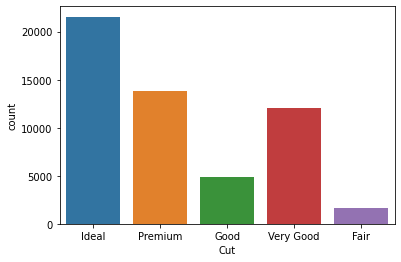

Column Name = Color
['E' 'I' 'J' 'H' 'F' 'G' 'D']
Number of unique values = 7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


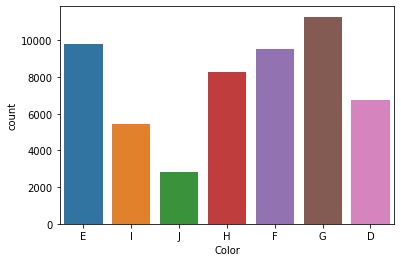

Column Name = Clarity
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of unique values = 8


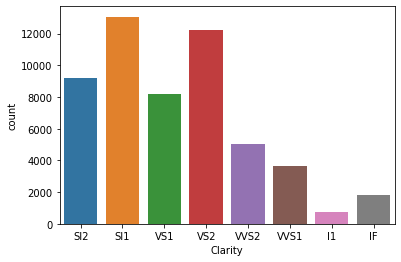

In [ ]:
for i in cat_cols:
    print('Column Name =',i)
    print(df[i].unique())
    print('Number of unique values =',df[i].nunique())
    sns.countplot(df[i])
    plt.show()

## Converting Categorical to numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
cols = ['Cut',	'Color',	'Clarity']
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [ ]:
df.head()

,Carat,Cut,Color,Clarity,Depth,Table,Price,Length,Width,Height,log_price
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,5.786897
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,5.786897
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,5.789960
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,5.811141
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,5.814131


## Building Models

In [ ]:
X = df.drop(['Price','log_price'], axis = 1)
y = df[['Price','log_price']]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state = 1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152, 2), (10788, 2))

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import statsmodels
import statsmodels.api as sm


## Linear Regression Model

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train['log_price'])
lr_pred=lr.predict(X_test)

In [ ]:
lr_r2_score=r2_score(y_test['log_price'],lr_pred)
print(lr_r2_score)

0.9510387613615795


In [ ]:
predicted_Price_lr = np.exp(lr_pred)

In [ ]:
predicted_Price_lr[:10]

array([ 575.0396395 , 5955.700939  , 2422.61875329,  699.43238441,
       6997.6801415 , 1635.74165005, 6194.41886333,  884.35501413,
       8806.9941641 , 1167.06903655])

## Linear Regression OLS Model

In [ ]:
linreg_model = sm.OLS(y_train['log_price'], X_train).fit()

print(linreg_model.summary())

                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          5.137e+06
Date:                Tue, 15 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:02:37   Log-Likelihood:                          408.16
No. Observations:               43152   AIC:                                     -798.3
Df Residuals:                   43143   BIC:                                     -720.3
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
linreg_pred = linreg_model.predict(X_test)

In [ ]:
predicted_log_Price = np.exp(linreg_pred)
actual_Price = y_test['Price']

In [ ]:
r2_score(y_test['Price'],predicted_log_Price)

0.8822365098066112

In [ ]:
predicted_log_Price[:10]

2714      575.279070
14653    5955.128610
52760    2422.936809
48658     699.406641
14812    6998.379905
37498    1635.553586
12456    6196.470954
16738     884.412843
21542    8808.503907
40732    1167.466245
dtype: float64

In [ ]:
actual_Price[:10]

2714      564
14653    5914
52760    2562
48658     537
14812    5964
37498     984
12456    5247
16738     611
21542    9645
40732    1162
Name: Price, dtype: int64

In [ ]:
# calculate rmse using rmse()
linreg_model_rmse = rmse(actual_Price, predicted_Price)

# calculate R-squared using rsquared
linreg_model_rsquared = linreg_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_rsquared_adj = linreg_model.rsquared_adj 

print(linreg_model_rmse)
print(linreg_model_rsquared)
print(linreg_model_rsquared_adj)

1352.7266562648463
0.9990676642986592
0.9990674698054318


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [ ]:
dt=DecisionTreeRegressor()


In [ ]:
dt.fit(X_train,y_train['log_price'])

DecisionTreeRegressor()

In [ ]:
dt_pred=dt.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test['log_price'],dt_pred))

0.12385724866439515

In [ ]:
r2_score(y_test['log_price'],dt_pred)

0.9848303533755537

In [ ]:
predicted_Price_dt = np.exp(dt_pred)
actual_Price_dt = y_test['Price']

In [ ]:
((predicted_Price_dt[:10]))

array([  547.,  5884.,  2440.,   537.,  6289.,   984.,  5177.,   605.,
       10036.,  1126.])

In [ ]:
actual_Price_dt[:10]

2714      564
14653    5914
52760    2562
48658     537
14812    5964
37498     984
12456    5247
16738     611
21542    9645
40732    1162
Name: Price, dtype: int64

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train['log_price'])
rf_tr_pred = rf_model.predict(X_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
print('RF model R2_score:',r2_score(y_train['log_price'],rf_tr_pred))
print('RF model rmse:', np.sqrt(mean_squared_error(y_test['log_price'],rf_pred)))
print('RF model mse:', mean_squared_error(y_test['log_price'],rf_pred))
print('RF model mae:', mean_absolute_error(y_test['log_price'],rf_pred))


RF model R2_score: 0.9988299805806942
RF model rmse: 0.08918932769417089
RF model mse: 0.007954736174538199
RF model mae: 0.06298719991418869


In [ ]:
predicted_Price_rf = np.exp(rf_tr_pred)
actual_Price_rf = y_test['Price']

In [ ]:
predicted_Price_rf[:10]

array([ 1336.73106665,  4673.25265997,   959.00153627, 10595.30525391,
        3250.23894471,   699.79615245, 10559.5224166 , 11845.27936573,
        2895.78128911,  4106.42409899])

### We can observe that Random forest model gives the best prediction.